In this notebook I will summarize the Sea Patches cruise data from the Tromsøflaket region. 

    - I will select data that overlap with the area the SB covered between June 21st and June 29th.
    - Map SB path and SP stations to select relevant stations.
    - If stations and trajectory overlap a bit in time and space I will keep it separate per stations. Otherwise I will add them together and use the values as an indication of the assemblage all across the SB sampling area (volume) Limit to depth.
    


# Tromsøflaket Bio Analysis


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cartopy.crs as ccrs
import cartopy
import sb_tools


In [2]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

In [3]:
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

## Setting Lat/Lon boundaries
### Sailbuoy sampling area

In [4]:
SB_env_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SB_env_tromsøflaket2018.xlsx',header=0, engine="openpyxl")

In [5]:
lon_min = np.min(SB_env_df['longitude (deg)'])
lon_max = np.max(SB_env_df['longitude (deg)'])

lat_min = np.min(SB_env_df['latitude (deg)'])
lat_max = np.max(SB_env_df['latitude (deg)'])

extent = [lon_min-4, lon_max+1, lat_min-2.5, lat_max+0.3]

### SeaPatches2018 Sample Station

In [6]:
SP_stations_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SeaPatchesStations.xlsx',header=0)

In [7]:
SP_lons = SP_stations_df['longitude (deg)']
SP_lats = SP_stations_df['latitude (deg)']
stn_num = SP_stations_df['Station']


In [8]:
tromsø_lon = 18.9553
tromsø_lat = 69.6492
fname_topo = fname_topo = "C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/NordNorgeTopo_tromsoflaket.xlsx"

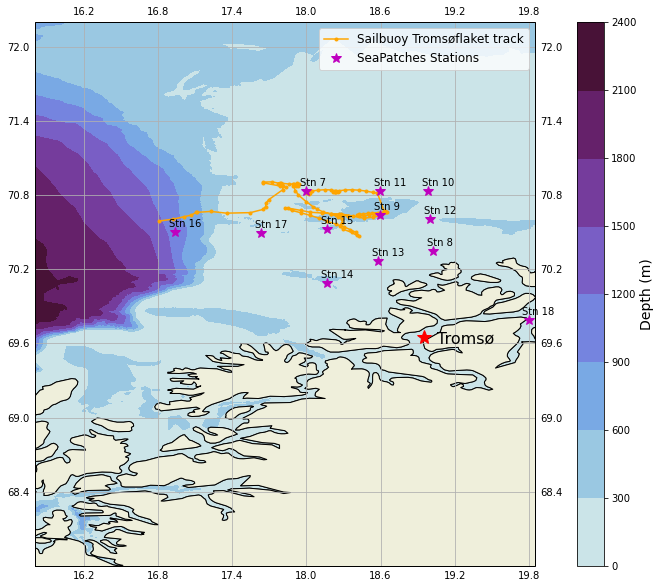

In [9]:
fig = plt.figure(figsize=(15,10))
# create map
projection = ccrs.PlateCarree()
sb_tools.plot_tromsoflaket(plt.axes,fname_topo, projection=projection)

# Add SB track
plt.plot(SB_env_df['longitude (deg)'],SB_env_df['latitude (deg)'], '.-',color='orange', label='Sailbuoy Tromsøflaket track',transform=projection)

# Add SP stations
plt.plot(SP_lons, SP_lats, 'm*', label='SeaPatches Stations', markersize=10,transform=projection)
for num in range(6,len(stn_num)):
    plt.text(SP_lons[num]-0.05, SP_lats[num]+0.04, 'Stn ' + str(stn_num[num]), fontsize=10,transform=projection)


plt.xlabel('Longitude [deg]', axis_font)
plt.ylabel('Latitude [deg]', axis_font)
#plt.title('2018 GLIDER and Sea Patches Samples', title_font)
plt.legend(fontsize=12)

In [10]:
SB_env_df

,datetime,longitude (deg),latitude (deg),sea_water_temperature (ï¿½ï¿½C),conductivity (mS/cm),o2_concentration,o2_air_saturation (%),o2_water_temperature (ï¿½ï¿½C),salini
0,2018-06-21 09:25:00,18.017429,70.832222,7.573,34.799999,394.799988,105.5,7.58,NaN
1,2018-06-21 09:30:00,18.015720,70.832458,7.598,34.820000,395.299988,106.0,7.61,NaN
2,2018-06-21 09:35:00,18.014130,70.832611,7.604,34.790001,396.000000,106.0,7.61,NaN
3,2018-06-21 09:40:00,18.013321,70.832764,7.614,34.790001,395.899994,106.0,7.62,NaN
4,2018-06-21 09:45:00,18.016649,70.832191,7.610,34.840000,395.899994,106.0,7.62,NaN
...,...,...,...,...,...,...,...,...,...
123,2018-06-29 14:00:00,17.106421,70.660141,7.826,35.599998,377.600006,101.5,7.83,NaN
124,2018-06-29 16:00:00,17.070061,70.639229,7.793,35.580002,376.700012,101.5,7.80,NaN
125,2018-06-29 18:00:00,17.010780,70.626091,7.850,35.619999,378.799988,102.0,7.85,NaN
126,2018-06-29 20:00:00,16.924110,70.606201,7.769,35.490002,375.799988,101.0,7.77,NaN


The stations that will be used to compare Sailbuoy broadband echosounder data to Sea Patches tows are **Stn 7, Stn 11, Stn 15, Stn 16, Stn 17**. These stations are within the analysis zone.